### Imports

In [195]:
import math
import random
from itertools import product
from functools import partial, cmp_to_key

import numpy as np
import pandas as p
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import to_rgba

### Utility functions 

In [2]:
def plot_points(points, addnotations = [], **kwargs):
    # plot points
    if len(points):
        plt.scatter(*zip(*points), **kwargs)
    
    # plot addnotations
    for p, text in zip(points, addnotations):
        plt.annotate(text, p, (5, 5), textcoords='offset pixels')

def plot_segments(segments, colors = None, zorder=1, **kwargs):
    # handle colors conversion
    if isinstance(colors, list):
        colors = [to_rgba(c) for c in colors]
    elif colors is not None:
        colors = [to_rgba(colors)] * len(segments)
    
    # plot segments using collection for better performance
    plt.gca().add_collection(LineCollection(segments, colors=colors, zorder=zorder, **kwargs))

def plot_chain(points, closed=False, **kwargs):
    # create segments
    segments = [
        (points[i-1], points[i])
        for i in range(1, len(points))
    ]
    
    # close loop if requested
    if closed:
        segments.append((points[-1], points[0]))
    
    plot_segments(segments, **kwargs)

In [79]:
def orient(a, b, c):
    return np.linalg.det(np.vstack((a - c, b - c)))

def angle(a, b):
    d = b - a
    return np.arctan2(d[1], d[0])

def dist2(a, b):
    return np.sum(np.square(b - a))

### Points generation

In [122]:
def random_points_plane(n, low, high):
    return np.random.uniform(low=low, high=high, size=(n, 2))

def random_points_circle(n, radius, center):
    angles = np.random.uniform(low=0, high=2*np.pi, size=(n))
    points = np.full((n, 2), radius, dtype='d')
    points[:, 0] *= np.cos(angles)
    points[:, 1] *= np.sin(angles)
    points[:, 0] += center[0]
    points[:, 1] += center[1]
    return points

def random_points_line(n, vector, low, high):
    t_min = max((low - vector[0,0]) / (vector[1,0] - vector[0,0]), (low - vector[0,1]) / (vector[1,1] - vector[0,1]))
    t_max = min((high - vector[0,0]) / (vector[1,0] - vector[0,0]), (high - vector[0,1]) / (vector[1,1] - vector[0,1]))
    
    t = np.random.uniform(low=t_min, high=t_max, size=(n, 1))
    return (1-t) * vector[0] + t * vector[1]

def random_points_square():
    points = []
    for _ in range(25):
        points.append((10, random.uniform(-10, 10)))
        points.append((-10, random.uniform(-10, 10)))
        points.append((random.uniform(-10, 10), 10))
        points.append((random.uniform(-10, 10), -10))
    
    return np.array(points)

def random_points_square_complex():
    # corners
    points = [(0,0), (10,0), (10, 10), (0,10)]
    
    # sides
    points += [(0, random.uniform(0, 10)) for _ in range(25)]
    points += [(random.uniform(0, 10), 0) for _ in range(25)]
    
    # diagonals
    for _ in range(20):
        points.append((random.uniform(0, 10),) * 2)
        v = random.uniform(0, 10)
        points.append((v, 10-v))
    
    return np.array(points)

In [123]:
POINTS_A = random_points_plane(100, -100, 100)
POINTS_B = random_points_circle(100, 10, (0,0))
POINTS_C = random_points_square()
POINTS_D = random_points_square_complex()

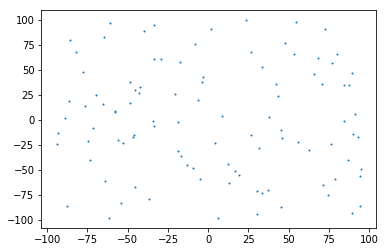

In [124]:
plot_points(POINTS_A, s=1)

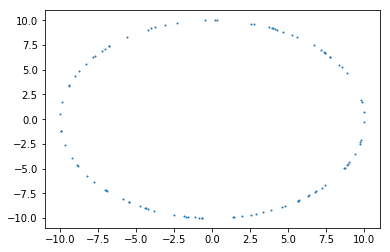

In [127]:
plot_points(POINTS_B, s=1)

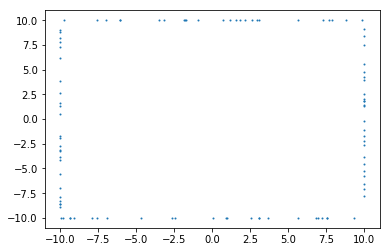

In [128]:
plot_points(POINTS_C, s=1)

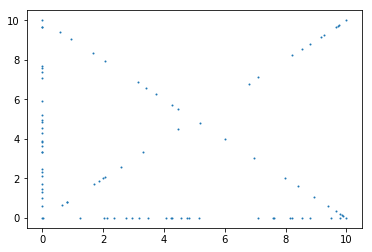

In [129]:
plot_points(POINTS_D, s=1)

### Graham's scan

In [256]:
def comparator(p0):
    def comp(a,b):
        o = orient(p0, a, b)
        if abs(o) < 0.001:
            return dist2(p0, a) - dist2(p0, b)
        return o
    return comp

def convex_hull_graham(points):
    
    # find point with lowest y
    i0 = points.argmin(axis=0)[1]
    p0 = points[i0] 
    points = points[np.arange(len(points)) != i0]
    
    # sort points
    points = sorted(points, key=cmp_to_key(comparator(p0)), reverse=True)
    
    # initialize stack
    hull = [p0, *points[:2]]
    
    # main loop
    i = 2
    while i < len(points):
        if orient(hull[-2], hull[-1], points[i]) < 0:
            hull.pop()
        else:
            hull.append(points[i])
            i += 1
    
    return hull

#### Example

In [257]:
points = random_points_plane(10, -100, 100)

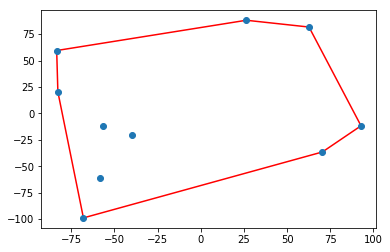

In [258]:
plot_chain(convex_hull_graham(points), closed=True, colors='r')
plot_points(points)

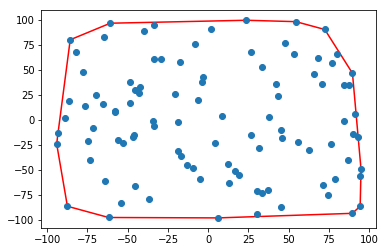

In [259]:
plot_chain(convex_hull_graham(POINTS_A), closed=True, colors='r')
plot_points(POINTS_A)

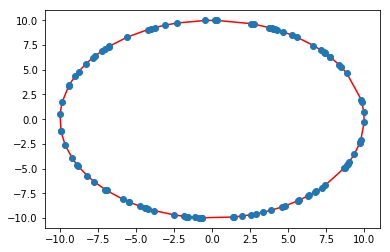

In [260]:
plot_chain(convex_hull_graham(POINTS_B), closed=True, colors='r')
plot_points(POINTS_B)

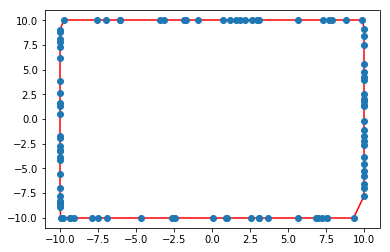

In [261]:
plot_chain(convex_hull_graham(POINTS_C), closed=True, colors='r')
plot_points(POINTS_C)

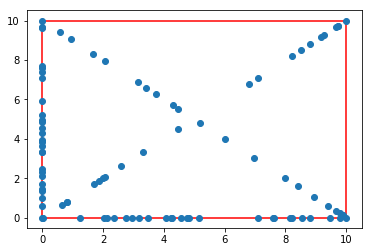

In [262]:
plot_chain(convex_hull_graham(POINTS_D), closed=True, colors='r')
plot_points(POINTS_D)